In [173]:
import numpy as np
import matplotlib as mpl
%matplotlib inline

import matplotlib.pyplot as plt




def shift_latt(latt):
    
    grid = latt
   #c = np.array([[0, 1, 0, -1, 0, 1, -1, -1, 1], [0, 0, 1, 0, -1, 1, 1, -1, -1]])
    
    #for i in range (1,9):
        #grid[:,:,i] = np.roll(np.roll(grid[:, :, i], shift=c[1,i], axis=0), shift=c[0,i], axis=1)
    
    # center (0,0)
    # stays constant
        
    # east (0,1)
    ch = 1
    grid[:, :, ch] = np.roll(grid[:, :, ch], shift=1, axis=1)
        
    # north (-1, 0)
    ch = 2
    grid[:, :, ch] = np.roll(grid[:, :, ch], shift=-1, axis=0)
        
    # west (0, -1)
    ch = 3
    grid[:, :, ch] = np.roll(grid[:, :, ch], shift=-1, axis=1)
        
    # south (1, 0)
    ch = 4
    grid[:, :, ch] = np.roll(grid[:, :, ch], shift=1, axis=0)
        
    # north-east(-1, 1)
    ch = 5
    grid[:, :, ch] = np.roll(np.roll(grid[:, :, ch], shift=-1, axis=0), shift=1, axis=1)
        
    # north-west(-1, -1)
    ch = 6
    grid[:, :, ch] = np.roll(np.roll(grid[:, :, ch], shift=-1, axis=0), shift=-1, axis=1)
        
    # south-west(1, -1)
    ch = 7
    grid[:, :, ch] = np.roll(np.roll(grid[:, :, ch], shift=1, axis=0), shift=-1, axis=1)
        
    # south-east(1, 1)
    ch = 8
    grid[:, :, ch] = np.roll(np.roll(grid[:, :, ch], shift=1, axis=0), shift=1, axis=1)
            
    return grid

def shift_latt_opt(latt):
    
    grid = latt
    c = np.array([[0, 1, 0, -1, 0, 1, -1, -1, 1], [0, 0, 1, 0, -1, 1, 1, -1, -1]])
    for i in range (1,9):
        grid[:,:,i] = np.roll(np.roll(grid[:, :, i], shift=c[1,i], axis=0), shift=c[0,i], axis=1)
    return grid


def sum_occ(mat):
    occ = np.sum(mat, axis=2, dtype=float)
    return occ

def calc_j(c, mat):
    j = np.dot(mat, c)
    
    # Alternative
    #j1 = np.einsum('abc, cd-> abd', mat, c)
    
    return j


def calc_avg_vel(rho, j):
    u = j / rho.reshape(rows, cols, 1)
 
    # Alternative
    #u = (j.T / rho.T).T
    
    return u

def calc_equilibrium(w, rho, u, c):
    
    #ch = len(w)
    #rows = rho.shape[0]
    #cols = rho.shape[1]

    f_eq = np.zeros((rows,cols,q))
    
    #a = np.arange(rows) -> Statt Schleifen
    
    
    for k in range(rows):
        for j in range(cols):
            f_eq[k,j,:] = w * rho[k,j] * (1 + 3 * c.dot(u[k,j]) + 9/2 * ((c.dot(u[k,j]))**2) - 3/2 * u[k,j].dot(u[k,j]))
            #for i in range(ch):
                #node = (k,j)
                
                #rho_temp = rho[node]
                #u_temp = u[node]#.reshape((-1,1)).T
                #c_temp = c[i]#.reshape((-1,1))
                
                # Optimierung die 3 For.Schleifen entfernen
                #f_eq[k,j,i] = w[i] * rho_temp * (1 + 3 * u_temp.dot(c_temp) + 9/2 * u_temp.dot(c_temp)**2 - 3/2 * u_temp.dot(u_temp))
    return f_eq

#################
rows = 30
cols = 30
q = 9
timesteps = 200

# c = np.array([[0, 0, -1, 0, 1, -1, -1, 1, 1], [0, 1, 0, -1, 0, 1, -1, -1, 1]])

c1 = np.array([[0,0], [0,1], [-1,0], [0,-1], [1,0], [-1,1], [-1,-1], [1,-1], [1,1]])

latt = np.zeros((rows, cols, q), dtype = float)

# initial lattice occupation
latt[:,:,0] = 4 / 9
latt[:,:,1] = 1 / 9
latt[:,:,2] = 1 / 9
latt[:,:,3] = 0
latt[:,:,4] = 1 / 9
latt[:,:,5] = 1 / 36
latt[:,:,6] = 1 / 36
latt[:,:,7] = 1 / 36
latt[:,:,8] = 1 / 36

#ch = 3
w = np.array([4/9, 1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36])
omega = 1

# shear wave decay init
epsilon = 0.1

for t in range(timesteps):
    #print(latt[:,:,3])
    latt = shift_latt(latt)
    j = calc_j(c1, latt)
    rho = sum_occ(latt)
    u = calc_avg_vel(rho, j)
    f_eq = calc_equilibrium(w, rho, u, c1)
    latt += omega * (f_eq - latt)

False
[[ True  True  True False  True  True False  True  True False  True  True
  False  True  True  True False  True False False False False False False
  False False False False  True False]
 [ True  True  True False  True  True False  True  True False  True  True
  False  True  True  True False  True False False False False False False
  False False False False  True False]
 [ True  True  True False  True  True False  True  True False  True  True
  False  True  True  True False  True False False False False False False
  False False False False  True False]
 [ True  True  True False  True  True False  True  True False  True  True
  False  True  True  True False  True False False False False False False
  False False False False  True False]
 [ True  True  True False  True  True False  True  True False  True  True
  False  True  True  True False  True False False False False False False
  False False False False  True False]
 [ True  True  True False  True  True False  True  True Fal

t=  20 [ 0.99411741  0.98197442  0.97130465  0.96236567  0.95526484  0.95000832
  0.94655133  0.94483994  0.94483994  0.94655133  0.95000832  0.95526484
  0.96236567  0.97130465  0.98197442  0.99411741  1.00729195  1.02086837
  1.03406414  1.04601579  1.0558739   1.06290145  1.06655782  1.06655782
  1.06290145  1.0558739   1.04601579  1.03406414  1.02086837  1.00729195]
t=  40 [ 0.99703705  0.99799603  0.99946454  1.00137057  1.00352243  1.00561833
  1.00729888  1.00823713  1.00823713  1.00729888  1.00561833  1.00352243
  1.00137057  0.99946454  0.99799603  0.99703705  0.99656102  0.99647673
  0.9966618   0.99698878  0.99734274  0.9976317   0.99779228  0.99779228
  0.9976317   0.99734274  0.99698878  0.9966618   0.99647673  0.99656102]
t=  60 [ 1.0036053   1.01124746  1.01804431  1.0238419   1.028546    1.03210299
  1.03448483  1.03567827  1.03567827  1.03448483  1.03210299  1.028546
  1.0238419   1.01804431  1.01124746  1.0036053   0.99535211  0.98681969
  0.978443    0.97074472  0.96

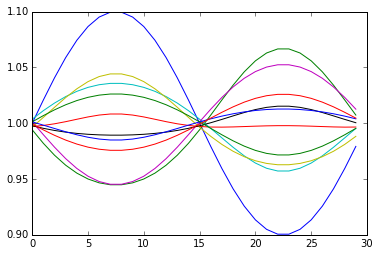

In [188]:
def set_rho(epsilon, rho0, rows, cols):

    # Offset rho0 setzen
    rho = np.full((rows,cols), rho0, dtype = float)
    valx = (2 * np.pi * np.arange(cols)) / (cols)
    print(isinstance(valx, float))
    rho += epsilon * np.sin(valx).reshape(1, cols)
    return rho

rho0 = 1.0
rho = set_rho(epsilon, rho0, rows, cols)
u = np.zeros((rows, cols, 2))


# Belegung des lattice, dass das mit rho, welches ich in der funktion set_rho berechnet habe, passt
latt = calc_equilibrium(w, rho, u, c1) # which is equal to f_eq

# sanity check if calculation of rho is equal to predefined rho in function above
print(rho == sum_occ(latt))
print(np.isclose(rho, sum_occ(latt), rtol=1e-15, atol=1e-20, equal_nan=False))

# plot stuff
plt.figure()

rho = sum_occ(latt)

# for setting rho0
for t in range(timesteps):
    if t%20 == 0:
        plt.plot(rho[rows//4,:])
        print('t= ',t, rho[rows//4,:])
    latt = shift_latt(latt)
    j = calc_j(c1, latt)
    rho = sum_occ(latt)
    u = calc_avg_vel(rho, j)
    f_eq = calc_equilibrium(w, rho, u, c1)
    latt += omega * (f_eq - latt)

[[[ True  True]
  [ True  True]
  [ True  True]
  ..., 
  [ True  True]
  [ True  True]
  [ True  True]]

 [[ True  True]
  [ True  True]
  [ True  True]
  ..., 
  [ True  True]
  [ True  True]
  [ True  True]]

 [[ True  True]
  [ True  True]
  [ True  True]
  ..., 
  [ True  True]
  [ True  True]
  [ True  True]]

 ..., 
 [[ True  True]
  [ True  True]
  [ True  True]
  ..., 
  [ True  True]
  [ True  True]
  [ True  True]]

 [[ True  True]
  [ True  True]
  [ True  True]
  ..., 
  [ True  True]
  [ True  True]
  [ True  True]]

 [[ True  True]
  [ True  True]
  [ True  True]
  ..., 
  [ True  True]
  [ True  True]
  [ True  True]]]
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  T

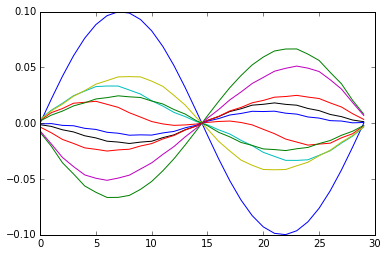

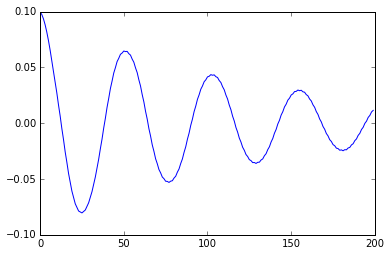

In [192]:
def set_u(epsilon, u0, rows, cols):
    
    u = np.full((rows,cols, 2), u0, dtype = float)
    u[:,:,1] = 0.0
    valy = (2 * np.pi * np.arange(rows)) / (rows-1)
    u[:,:,0] = u[:,:,0] + epsilon * np.sin(valy).reshape(rows,1)
    
    return u

rho = np.full((rows,cols), 1., dtype=float)
u0 = 0
u = set_u(epsilon, u0, rows, cols)

# Belegung des lattice, dass das mit u, welches ich in der funktion set_u berechnet habe, passt
latt = calc_equilibrium(w, rho, u, c1)

j = calc_j(c1, latt)
rho = sum_occ(latt)
u = calc_avg_vel(rho, j)

# Sanity check
print(u == calc_avg_vel(rho,j))
print(rho == sum_occ(latt))

o = np.zeros((1,0), dtype=float);

plt.figure()

# for setting u_x
for t in range(timesteps):
    if t%20 == 0:
        plt.plot(u[:,0,0], label='{t}'.format(t=t))
    o = np.append(o, u[rows//4,0,0])
    #print(u[rows//4,0,0])
    latt = shift_latt(latt)
    j = calc_j(c1, latt)
    rho = sum_occ(latt)
    u = calc_avg_vel(rho, j)
    f_eq = calc_equilibrium(w, rho, u, c1)
    latt += omega * (f_eq - latt)
    
#plt.legend(loc='best')

plt.figure()
plt.plot(np.array(np.arange(timesteps)), o)
plt.savefig('plot1.pdf')

In [85]:
np.arange(rows)

array([0, 1, 2, 3, 4])

In [124]:
def abc(rows, cols, ch, rho, u, c):
    for k in range(rows):
        for j in range(cols):
            f_eq[k,j,:] = w * rho[k,j] * (1 + 3 * c.dot(u[k,j]) + 9/2 * (c.dot(u[k,j]))**2 - 3/2 * u[k,j].dot(u[k,j]))
    return f_eq


print((abc(rows, cols, 9, rho, u, c1)).shape)

(25, 25, 9)
